In [2]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
try:
    import tensorflow as tf
except:
    print("install tensorflow")
    %pip install tensorflow
    import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
try:
    import tensorflow_datasets as tfds
except:
    print("install tensorflow datasets")
    %pip install tensorflow-datasets
    import tensorflow_datasets as tfds

In [4]:
def load_and_preprocess_kmnist():
    # Load the dataset from tensosorflow-datasets
    data, info = tfds.load("kmnist", as_supervised=True, with_info=True)
    
    train_data = data['train']
    test_data = data['test']
    
    train_images, train_labels = [], []
    test_images, test_labels = [], []

    for image, label in tqdm(train_data):
        train_images.append(image.numpy())
        train_labels.append(label.numpy())
    
    for image, label in tqdm(test_data):
        test_images.append(image.numpy())
        test_labels.append(label.numpy())

    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    
    # Normalize images to be between 0 and 1
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0
    
    train_images = np.expand_dims(train_images, -1)  
    test_images = np.expand_dims(test_images, -1)    
    
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)
    
    return (train_images, train_labels), (test_images, test_labels)

In [5]:


# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = load_and_preprocess_kmnist()

# Print shapes to verify
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


# Split the original training data into 70% training and 30% validation
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Print shapes to verify the split
print("\nAfter creating validation set:")
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)


2024-10-27 10:47:56.471678: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
100%|██████████| 10000/10000 [00:02<00:00, 4315.06it/s]


Train images shape: (60000, 28, 28, 1, 1)
Train labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1, 1)
Test labels shape: (10000, 10)

After creating validation set:
Train images shape: (42000, 28, 28, 1, 1)
Train labels shape: (42000, 10)
Validation images shape: (18000, 28, 28, 1, 1)
Validation labels shape: (18000, 10)


In [6]:
# class LearningRateTracker(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         # Get the learning rate from the optimizer
#         optimizer = self.model.optimizer
#         current_lr = float(tf.keras.backend.get_value(optimizer.learning_rate))
#         print(f"Epoch {epoch+1}: Learning rate is {current_lr}")
        
#         # Optionally, you can save the learning rates to a list for further analysis
#         if not hasattr(self, 'lr_history'):
#             self.lr_history = []
#         self.lr_history.append(current_lr)

# Base

---------- lr = 0.001 ----------


/sdf/home/m/melwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.7940 - loss: 0.7030 - val_accuracy: 0.9602 - val_loss: 0.1354
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9614 - loss: 0.1225 - val_accuracy: 0.9728 - val_loss: 0.0963
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9769 - loss: 0.0740 - val_accuracy: 0.9789 - val_loss: 0.0782
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9839 - loss: 0.0496 - val_accuracy: 0.9711 - val_loss: 0.1062
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9848 - loss: 0.0436 - val_accuracy: 0.9805 - val_loss: 0.0763
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9893 - loss: 0.0325 - val_accuracy: 0.9824 - val_loss: 0.0750
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9431 - loss: 0.2210
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


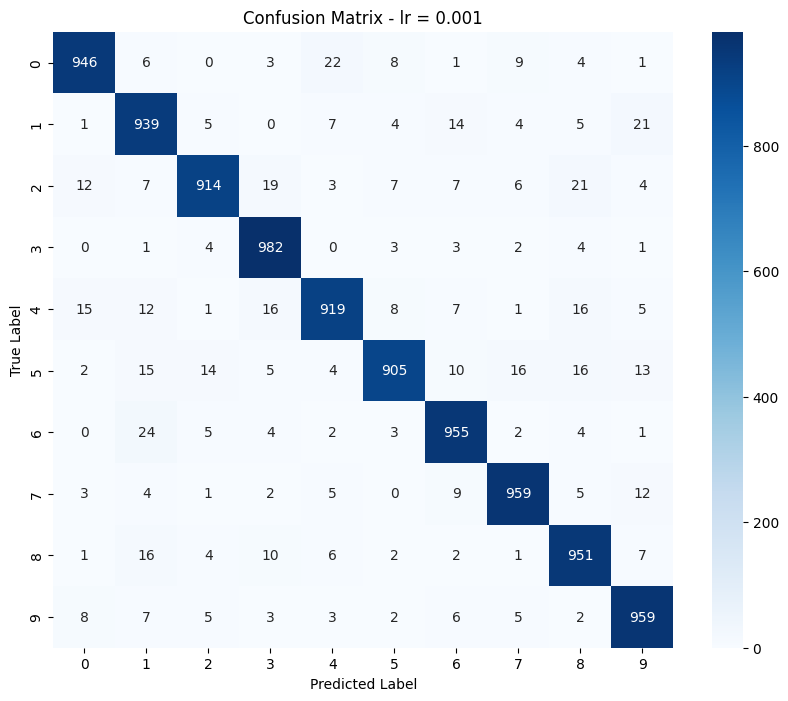

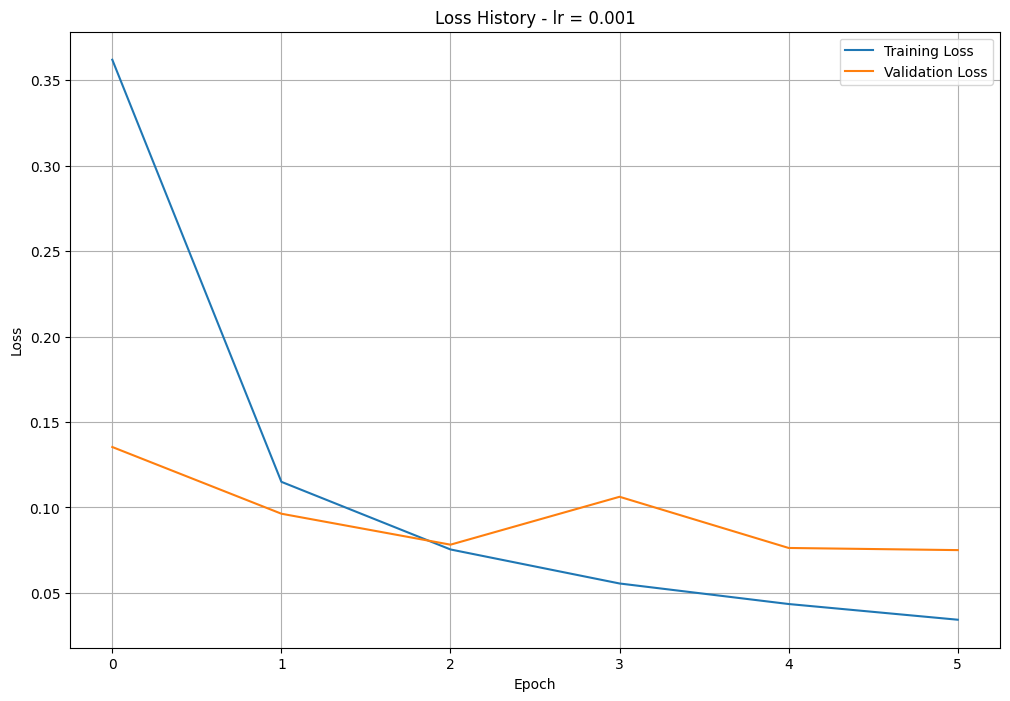

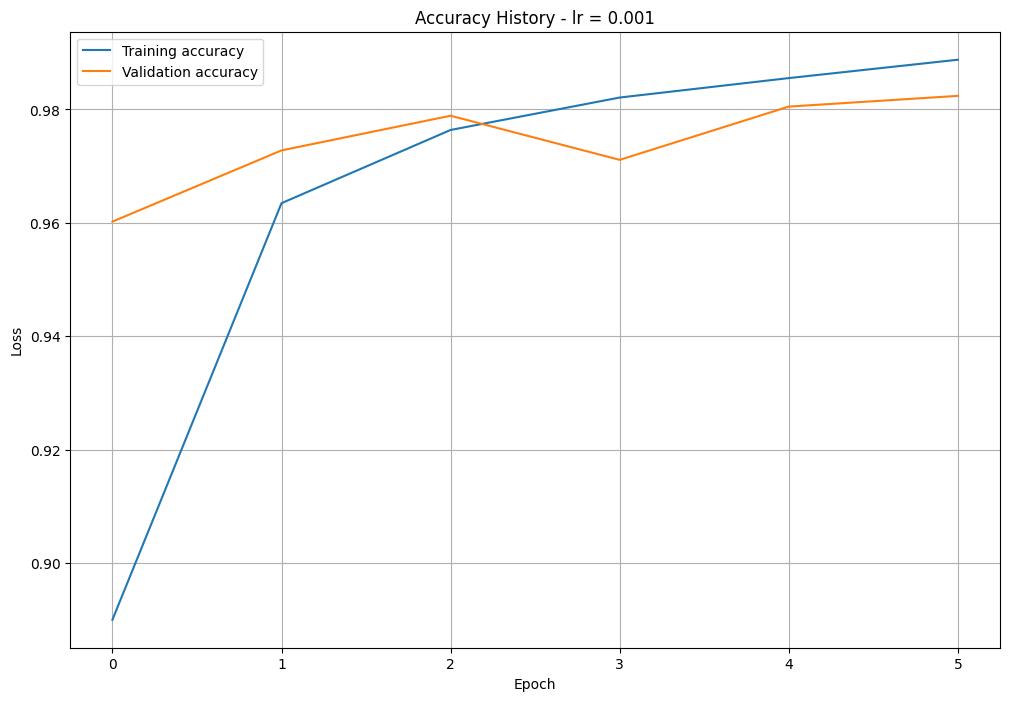

---------- lr = 0.01 ----------


/sdf/home/m/melwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7862 - loss: 1.0804 - val_accuracy: 0.9498 - val_loss: 0.1655
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9474 - loss: 0.1731 - val_accuracy: 0.9534 - val_loss: 0.1560
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9578 - loss: 0.1344 - val_accuracy: 0.9658 - val_loss: 0.1147
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9672 - loss: 0.1079 - val_accuracy: 0.9703 - val_loss: 0.1071
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9677 - loss: 0.1056 - val_accuracy: 0.9683 - val_loss: 0.1144
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9687 - loss: 0.1026 - val_accuracy: 0.9708 - val_loss: 0.1197
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9115 - loss: 0.3257
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


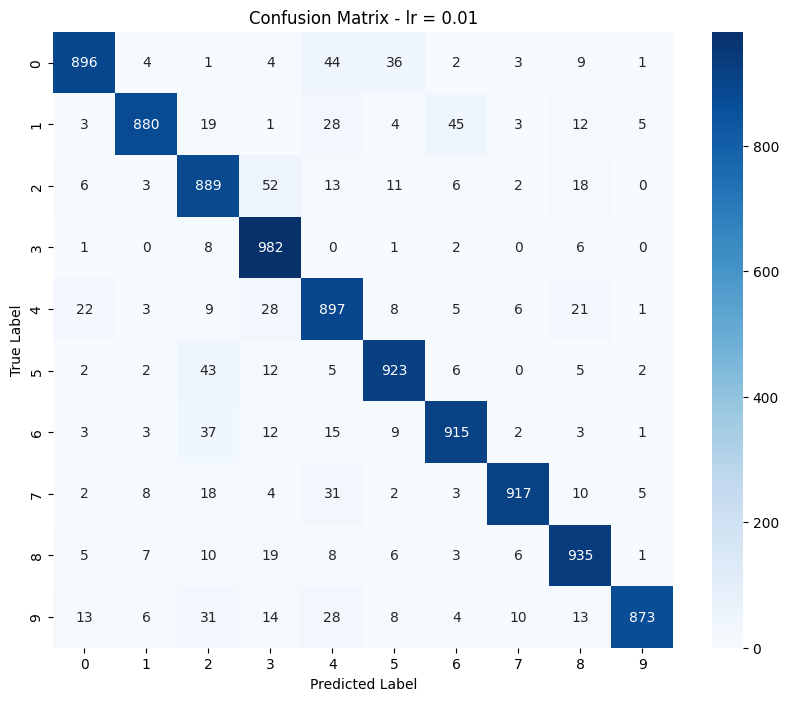

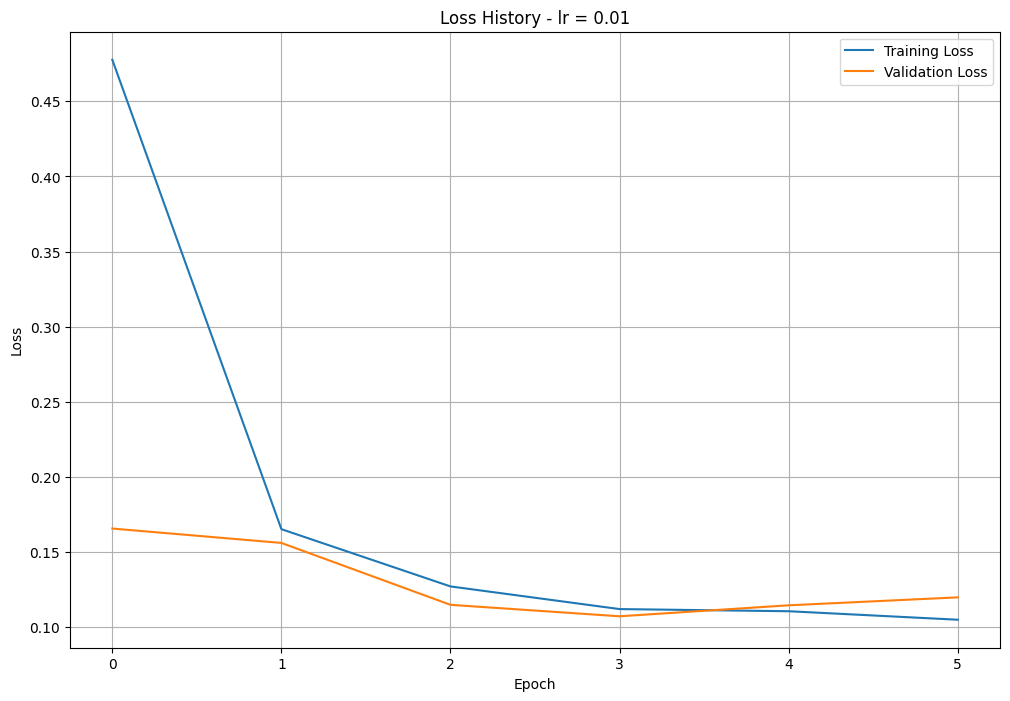

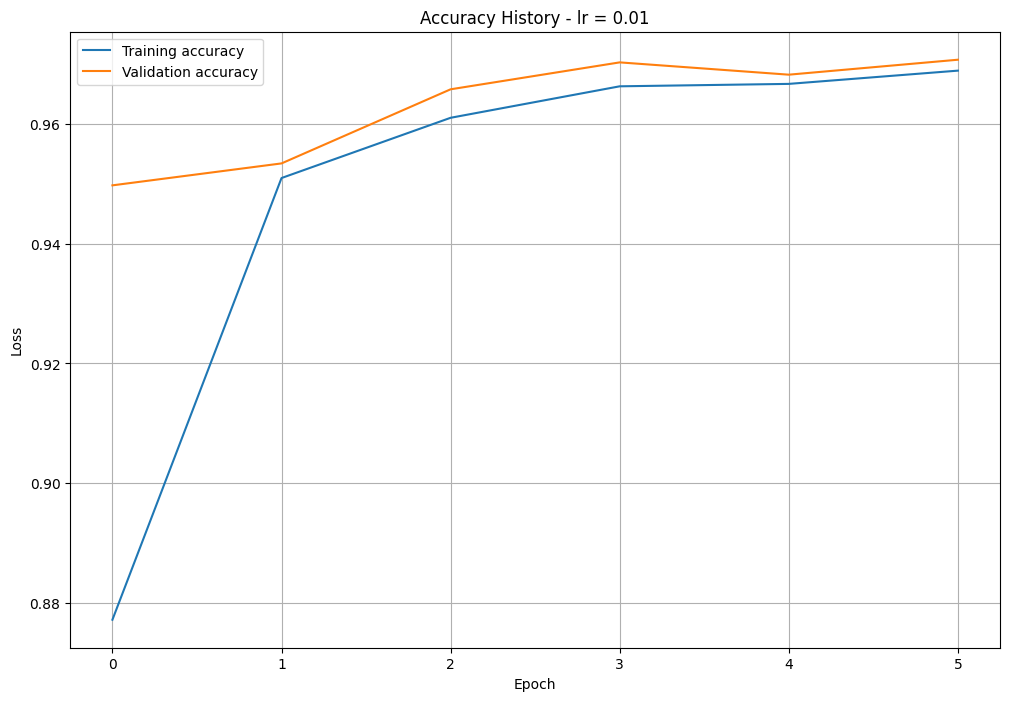

In [10]:
global_rate = [0.001, 0.01]
output = {}
for i in global_rate:
    print(f"---------- lr = {i} ----------")
    output[f'{i}'] = {}
    # Define the CNN model (same as before)
    def create_cnn():
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= i),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta = 1e-2, restore_best_weights=True)
    # Initialize the model
    cnn_model = create_cnn()
    
    # Train the model with validation
    history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels), callbacks=[early_stopping])

    # Evaluate on the test set
    test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
    # print(f"Test accuracy: {test_acc}")
    output[f'{i}']['test acc'] = test_acc

    predictions = cnn_model.predict(test_images)
    test_labels_classes = np.argmax(test_labels, axis=1)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(test_labels_classes, predicted_classes)
    
    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(f'Confusion Matrix - lr = {i}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Access the training and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Plot the loss history
    plt.figure(figsize=(12, 8))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Loss History - lr = {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, which = 'both')
    plt.legend()
    plt.show()

    # Access the training and validation loss
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Plot the loss history
    plt.figure(figsize=(12, 8))
    plt.plot(train_acc, label='Training accuracy')
    plt.plot(val_acc, label='Validation accuracy')
    plt.title(f'Accuracy History - lr = {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, which = 'both')
    plt.legend()
    plt.show()

# all changes 

---------- lr = 0.001 ----------


/sdf/home/m/melwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.1159 - loss: 0.1159 - val_accuracy: 0.1682 - val_loss: 0.0916
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.1656 - loss: 0.1054 - val_accuracy: 0.2576 - val_loss: 0.0866
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.2149 - loss: 0.0984 - val_accuracy: 0.3328 - val_loss: 0.0801
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.2682 - loss: 0.0916 - val_accuracy: 0.4078 - val_loss: 0.0741
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.3256 - loss: 0.0855 - val_accuracy: 0.4644 - val_loss: 0.0693
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.3622 - loss: 0.0809 - val_accuracy: 0.5014 - val_loss: 0.0652
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3995 - loss: 0.0766 - val_accuracy: 0.5313 - val_loss: 0.0616
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.4300 - loss: 0.0735 - 

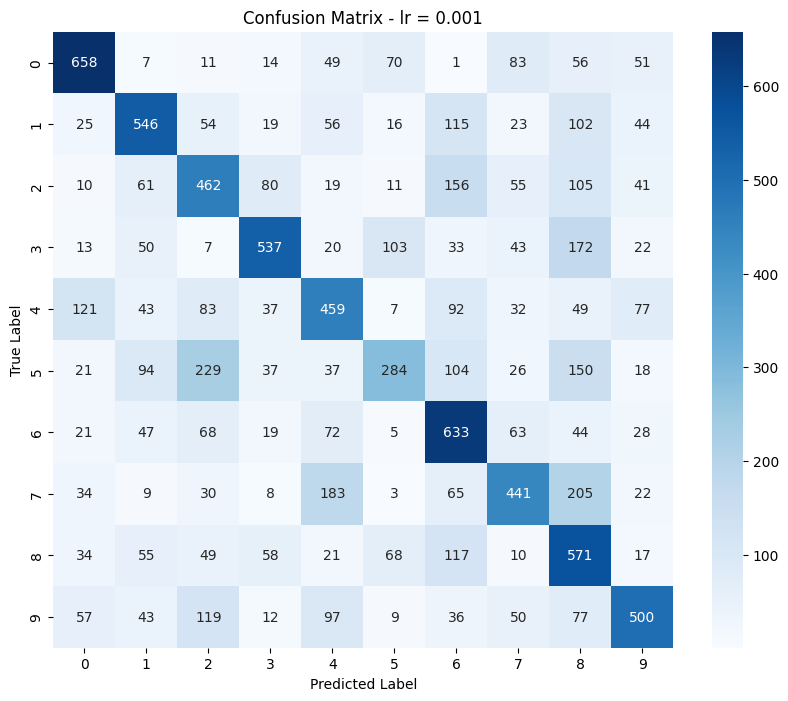

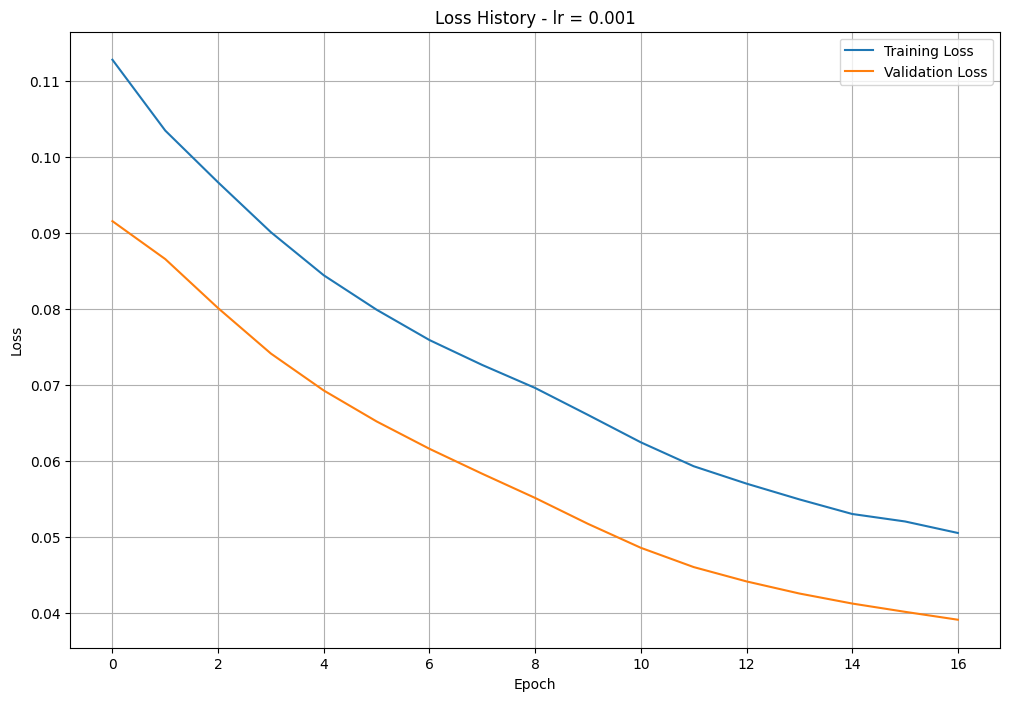

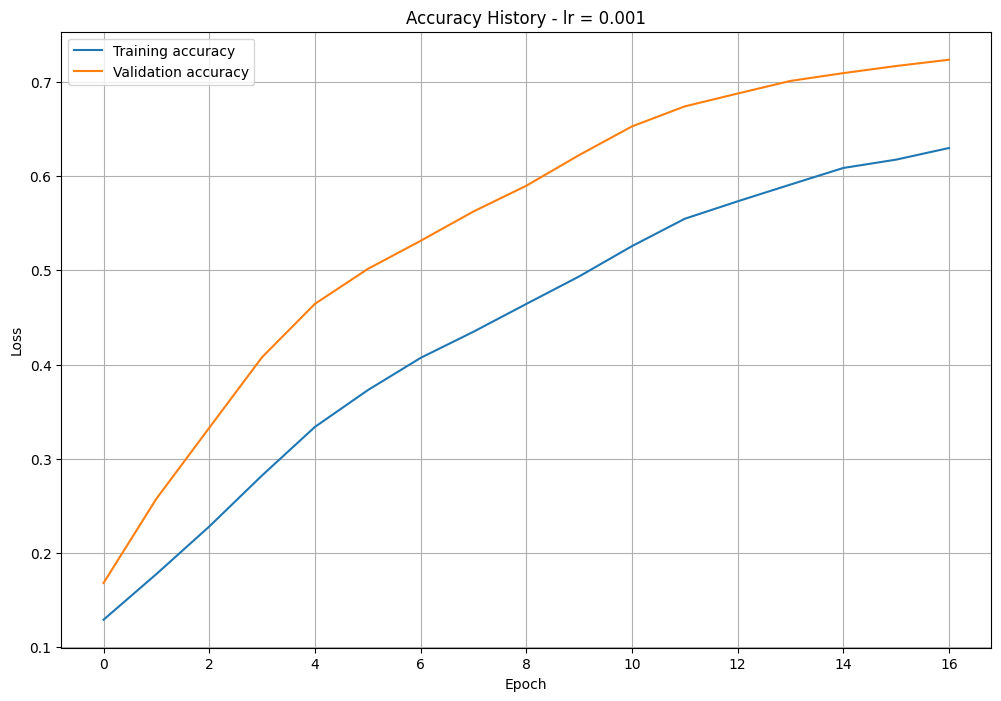

---------- lr = 0.01 ----------


/sdf/home/m/melwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.1959 - loss: 0.1026 - val_accuracy: 0.5934 - val_loss: 0.0559
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.5449 - loss: 0.0602 - val_accuracy: 0.7406 - val_loss: 0.0371
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6728 - loss: 0.0454 - val_accuracy: 0.7792 - val_loss: 0.0315
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7217 - loss: 0.0392 - val_accuracy: 0.7978 - val_loss: 0.0284
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7481 - loss: 0.0356 - val_accuracy: 0.8176 - val_loss: 0.0259
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7714 - loss: 0.0322 - val_accuracy: 0.8324 - val_loss: 0.0239
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7949 - loss: 0.0294 - val_accuracy: 0.8457 - val_loss: 0.0222
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8027 - loss: 0.0283 - 

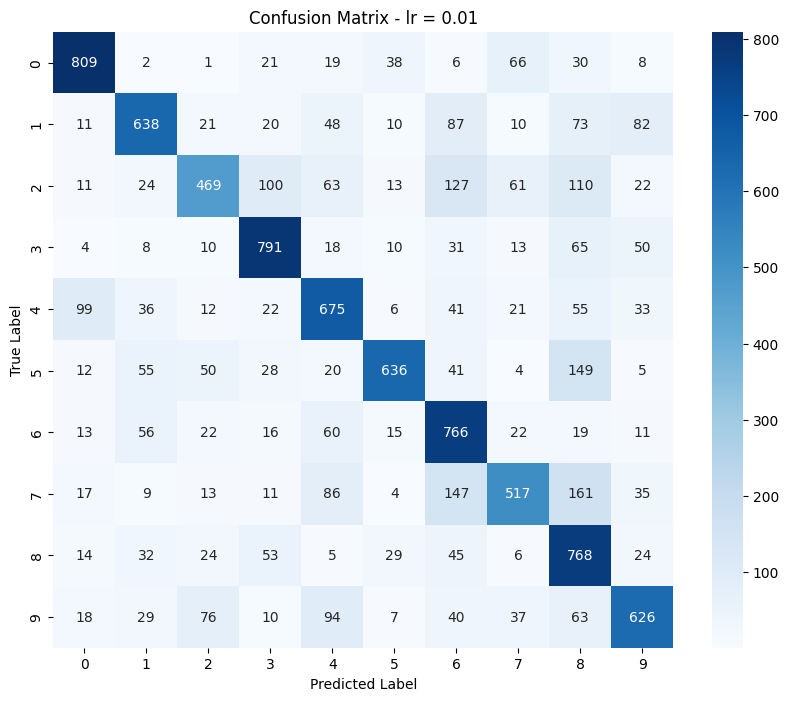

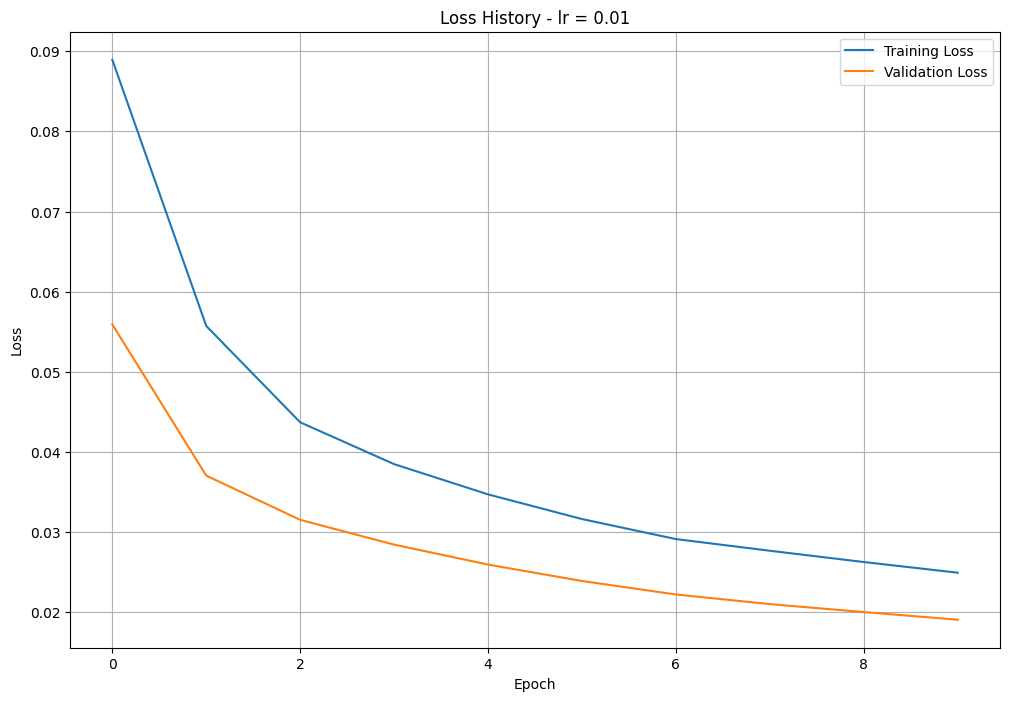

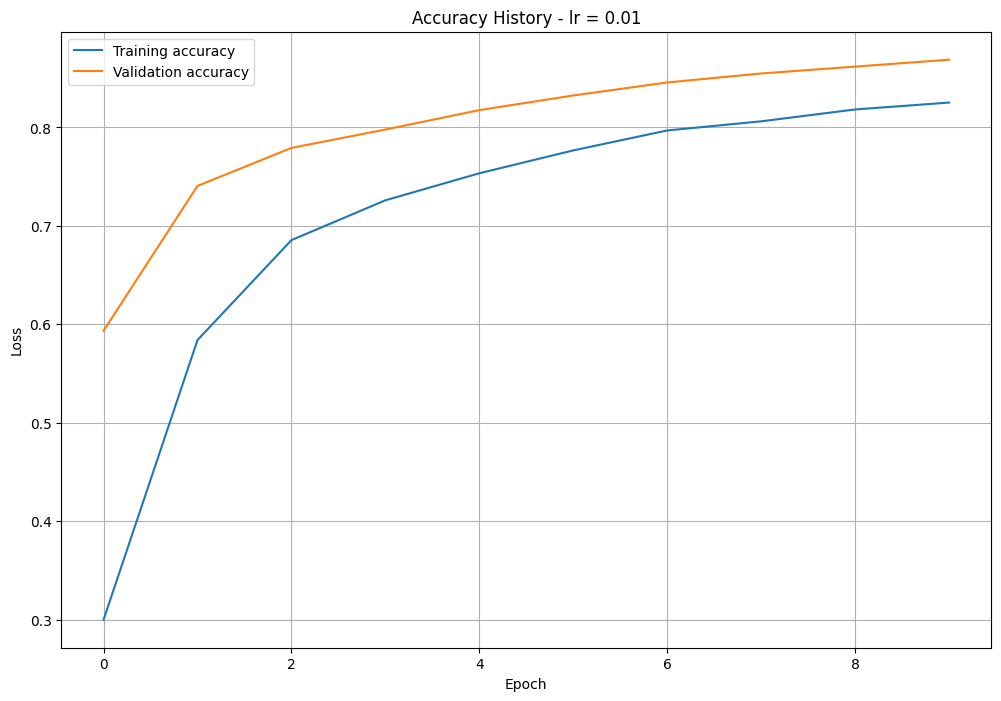

In [12]:
global_rate = [0.001, 0.01]
output = {}
for i in global_rate:
    print(f"---------- lr = {i} ----------")
    output[f'{i}'] = {}
    # Define the CNN model (same as before)
    def create_cnn():
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate= i),
                      loss='mean_squared_error',
                      metrics=['accuracy'])
        return model
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta = 1e-2, restore_best_weights=True)
    # Initialize the model
    cnn_model = create_cnn()
    
    # Train the model with validation
    history = cnn_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels), callbacks=[early_stopping])

    # Evaluate on the test set
    test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
    # print(f"Test accuracy: {test_acc}")
    output[f'{i}']['test acc'] = test_acc

    predictions = cnn_model.predict(test_images)
    test_labels_classes = np.argmax(test_labels, axis=1)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(test_labels_classes, predicted_classes)
    
    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(f'Confusion Matrix - lr = {i}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Access the training and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Plot the loss history
    plt.figure(figsize=(12, 8))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Loss History - lr = {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, which = 'both')
    plt.legend()
    plt.show()

    # Access the training and validation loss
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Plot the loss history
    plt.figure(figsize=(12, 8))
    plt.plot(train_acc, label='Training accuracy')
    plt.plot(val_acc, label='Validation accuracy')
    plt.title(f'Accuracy History - lr = {i}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, which = 'both')
    plt.legend()
    plt.show()

# Best CNN

/sdf/home/m/melwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6946 - loss: 1.0716 - val_accuracy: 0.8682 - val_loss: 0.4399
Epoch 2/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9268 - loss: 0.2391 - val_accuracy: 0.9636 - val_loss: 0.1223
Epoch 3/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9525 - loss: 0.1532 - val_accuracy: 0.9731 - val_loss: 0.0916
Epoch 4/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9653 - loss: 0.1114 - val_accuracy: 0.9773 - val_loss: 0.0808
Epoch 5/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9679 - loss: 0.0977 - val_accuracy: 0.9792 - val_loss: 0.0738
Epoch 6/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9727 - loss: 0.0857 - val_accuracy: 0.9804 - val_loss: 0.0707
Epoch 7/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9763 - loss: 0.0717 - val_accuracy: 0.9804 - val_loss: 0.0722
Epoch 8/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9791 - loss: 0.0645 - 

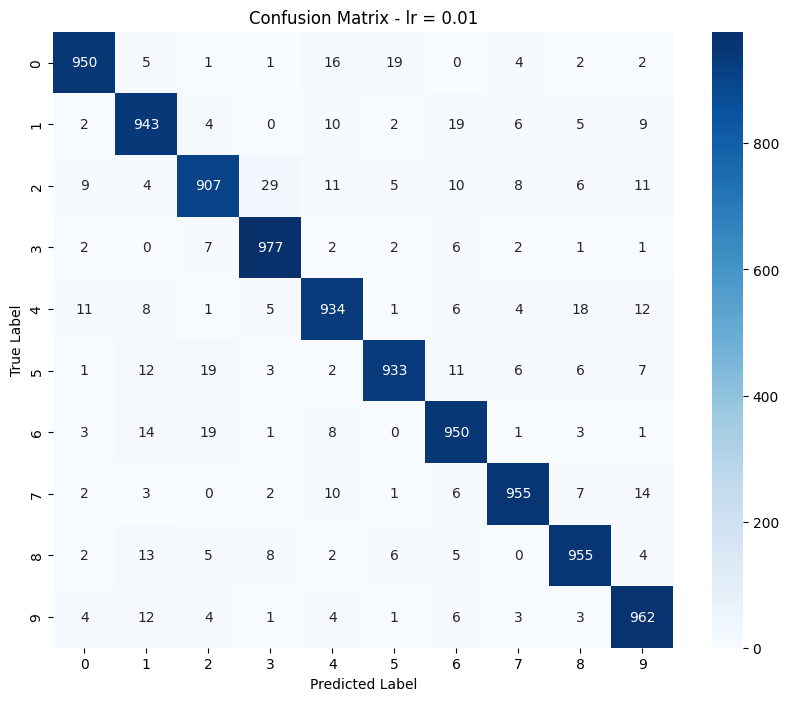

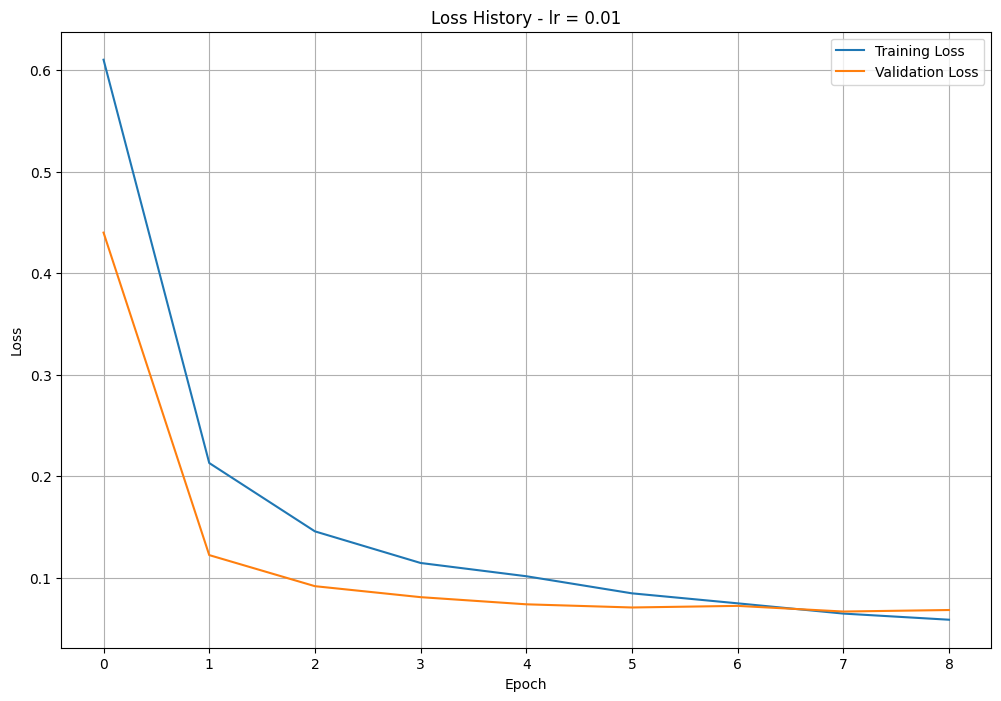

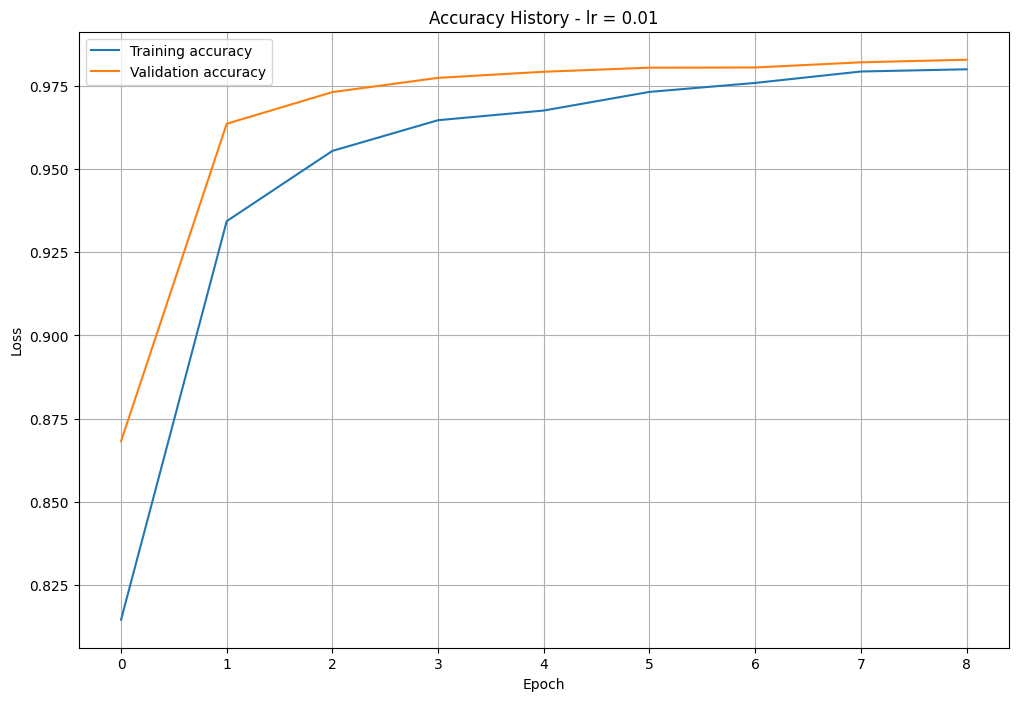

CPU times: user 24min 28s, sys: 1min 19s, total: 25min 48s
Wall time: 2min 10s


In [18]:
%%time
# Define the CNN model (same as before)
def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta = 1e-2, restore_best_weights=True)
# Initialize the model
cnn_model = create_cnn()

# Train the model with validation
history = cnn_model.fit(train_images, train_labels, epochs=15, batch_size=75, validation_data=(val_images, val_labels), callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc}")
output[f'{i}']['test acc'] = test_acc

predictions = cnn_model.predict(test_images)
test_labels_classes = np.argmax(test_labels, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title(f'Confusion Matrix - lr = {i}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Access the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss history
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title(f'Loss History - lr = {i}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, which = 'both')
plt.legend()
plt.show()

# Access the training and validation loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss history
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title(f'Accuracy History - lr = {i}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, which = 'both')
plt.legend()
plt.show()